<a href="https://colab.research.google.com/github/shaloy-lewis/Netflix_movies_and_tv_shows_clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering_Shaloy_Lewis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Netflix Movies and TV Shows Clustering </u></b>

## <b> Problem Description </b>

* This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.
* In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

## <b> Attribute Information </b>
1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Importing the libraries and the dataset**

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading data
path = '/content/drive/MyDrive/Netflix movies and TV shows clustering - Shaloy Lewis/Netflix_movies_and_tv_shows_clustering.csv'

original_df = pd.read_csv(path,index_col='show_id')
df = original_df.copy()

In [4]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.shape

(7787, 11)

In [6]:
df.nunique()

type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

The dataset contains 7787 records and 11 attributes.

# **Cleaning data**

**1. Checking for duplicate records:**

In [7]:
# Checking for duplicate records
df.duplicated().value_counts()

False    7787
dtype: int64

There are no duplicated records in the dataset.

**2. Checking for missing values and handling them:**

In [8]:
# Missing values in the dataset
df.isna().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
# Checking the unique values in each attribute of the dataset
df.nunique()

type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

* The missing values in the director, cast, and country attributes can be replaced with 'Unknown'
* 10 records with missing values in the date_added column can be dropped.
* The missing values in rating can be imputed with its mode, since this attribute is discrete.

In [10]:
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [11]:
df.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
df.shape

(7777, 11)

We have successfully handled all the missing values in the dataset.

**3. Country, listed_in, director:**

In [13]:
df.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [14]:
df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

* There are some movies / TV shows that were filmed in multiple countries,have multiple genres associated with it.
* To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.
* Also, let's consider only the primary genre of the respective movie / TV show.

In [15]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [16]:
df.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [17]:
df.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

**4. Converting the datatype of duration column to integer**

In [18]:
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [19]:
df[df['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [20]:
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [21]:
df.duration.dtype

dtype('int64')

We have successfully converted the datatype of duration column to int.

**5. converting date_added to datetime datatype:**

In [22]:
# Converting the datatype of date_added column to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

In [23]:
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

The shows were added on Netflix between 1st January 2008 and 16th January 2021.

In [24]:
# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

**6. Rating:**

The ratings can be changed to age restrictions that apply on certain movies and TV shows.

[Reference](https://www.primevideo.com/help/ref=atv_hp_nd_cnt?nodeId=GFGQU3WYEG6FSJFJ)

In [25]:
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [26]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

This step is done to improve the interpretability.

# **Exploratory Data Analysis**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, s1 to s7787
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7777 non-null   object
 1   title         7777 non-null   object
 2   director      7777 non-null   object
 3   cast          7777 non-null   object
 4   country       7777 non-null   object
 5   release_year  7777 non-null   int64 
 6   rating        7777 non-null   object
 7   duration      7777 non-null   int64 
 8   listed_in     7777 non-null   object
 9   description   7777 non-null   object
 10  month_added   7777 non-null   int64 
 11  year_added    7777 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 789.9+ KB


**1. Univatiate Analysis:**

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

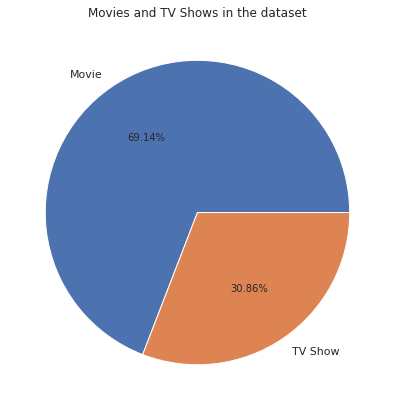

In [28]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

There are more movies (69.14%) than TV shows (30.86%)  in the dataset.

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

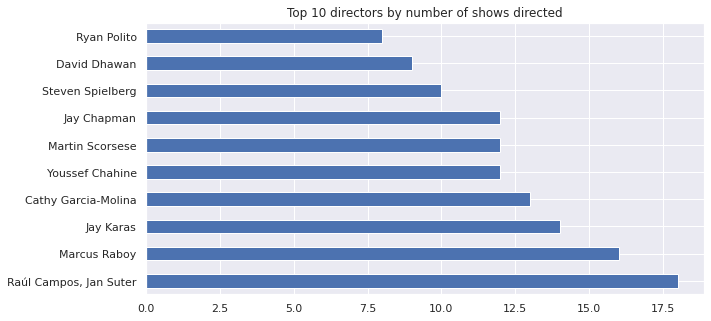

In [29]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

Raul Campos and Jan Suter togather have directed 18 movies / TV shows, higher than anyone in the dataset.

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

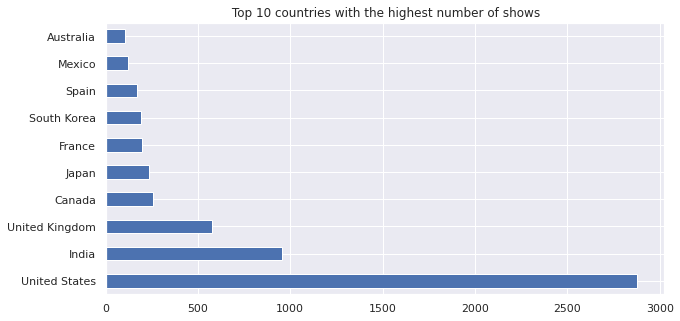

In [30]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

The highest number of movies / TV shows were based out of the US, followed by India and UK.

In [31]:
# % share of movies / tv shows by top 3 countries
df.country.value_counts().nlargest(3).sum()/len(df)*100

56.69281213835669

In [32]:
# % share of movies / tv shows by top 10 countries
df.country.value_counts().nlargest(10).sum()/len(df)*100

78.32068921177832

* The top 3 countries togather account for about 56% of all movies and TV shows in the dataset.
* This value increases to about 78% for top ten countries.

Text(0.5, 1.0, 'distribution by released year')

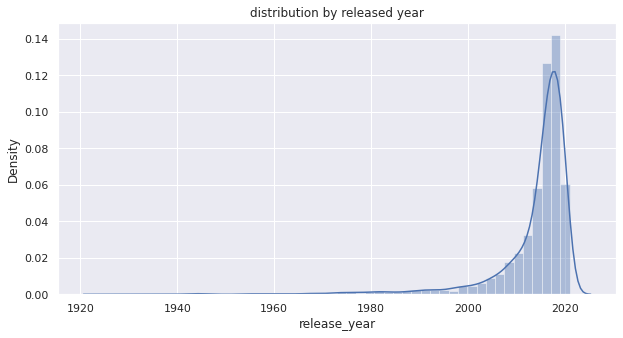

In [33]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.distplot(df['release_year'])
plt.title('distribution by released year')

Netflix has greater number of new movies / TV shows than the old ones.

Text(0.5, 1.0, 'Top 10 genres')

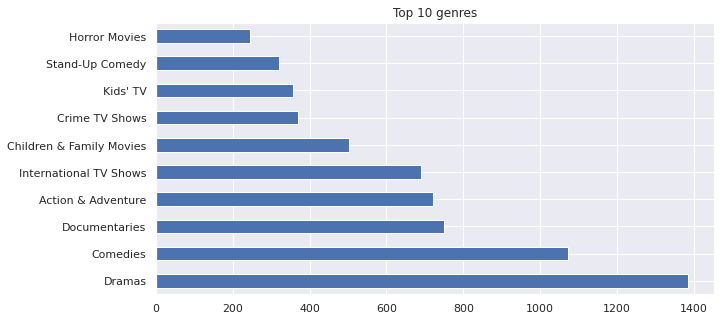

In [34]:
# Top 10 genres 
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

In [35]:
# Share of top 3 genres
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.26269769834126

In [36]:
# Share of top 10 genres
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

82.44824482448246

* The dramas is the most popular genre followed by comedies and documentaries. These three genres account for about 41% of all movies and TV shows.
* This value increases to about 82% for top 10 genres.

Text(0.5, 1.0, 'Number of shows based on ratings')

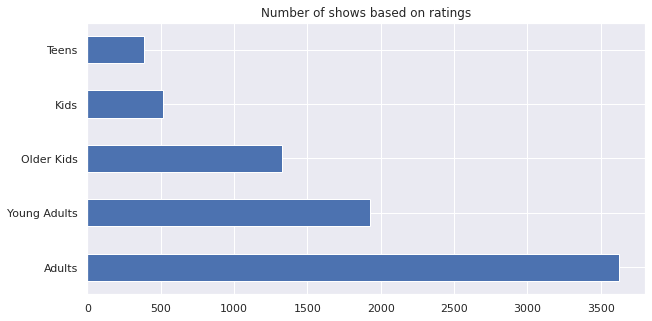

In [37]:
# Ratings
plt.figure(figsize=(10,5))
df.rating.value_counts().plot(kind='barh')
plt.title('Number of shows based on ratings')

There are more shows targeted toward the adult audience.

Text(0.5, 0, '')

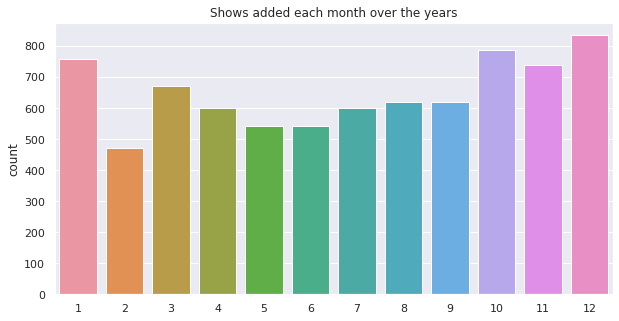

In [38]:
# Number of shows added on different months
plt.figure(figsize = (10,5)) 
sns.countplot(df['month_added'])
plt.title('Shows added each month over the years')
plt.xlabel('')

On average more number of shows are added in the months of October, November, December, and January.

Text(0.5, 0, '')

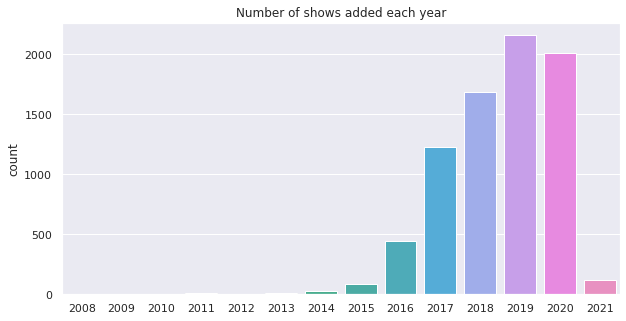

In [39]:
# Number of shows added over the years
plt.figure(figsize = (10,5)) 
sns.countplot(df['year_added'])
plt.title('Number of shows added each year')
plt.xlabel('')

* Netflix continuous to add more shows on its platform over the years.
* There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.
* We have Netflix data only up to 16th January 2021, hence there are less movies added.

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

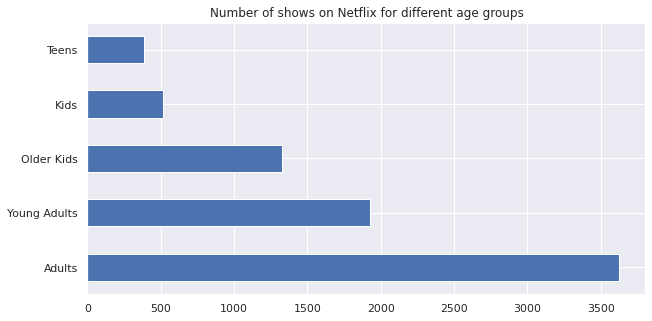

In [40]:
# Number of shows on Netflix for different age groups
plt.figure(figsize=(10,5))
df.rating.value_counts().plot(kind='barh')
plt.title('Number of shows on Netflix for different age groups')

* The majority of the shows on Netflix are catered to the needs of adult and young adult population.

**2. Bivariate analysis:**

In [41]:
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
show_id,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,8,2020
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12,2016
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12,2018
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11,2017
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1,2020


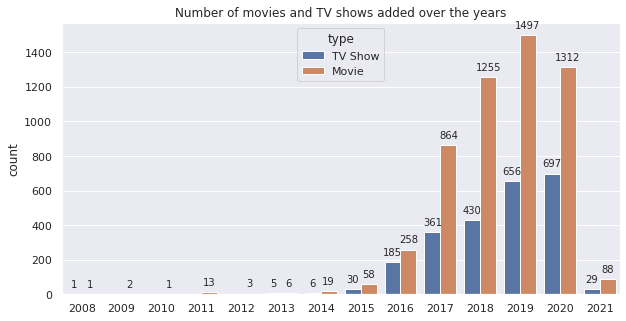

In [42]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

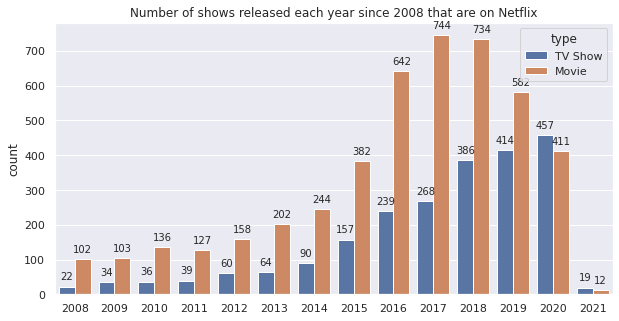

In [43]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

* Over the years, Netflix has consistently focused on adding more shows in its database.
* Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.
* This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.

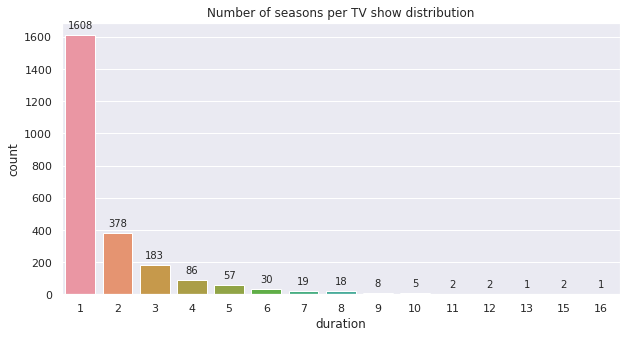

In [44]:
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [45]:
# % of tv shows with just 1 season
len(df[(df['type']=='TV Show') & (df['duration']==1)]) / len(df[df['type']=='TV Show'])* 100

67.0

* The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.
* There are very few TV shows that have more than 8 seasons.

Text(0.5, 1.0, 'Movie duration distribution')

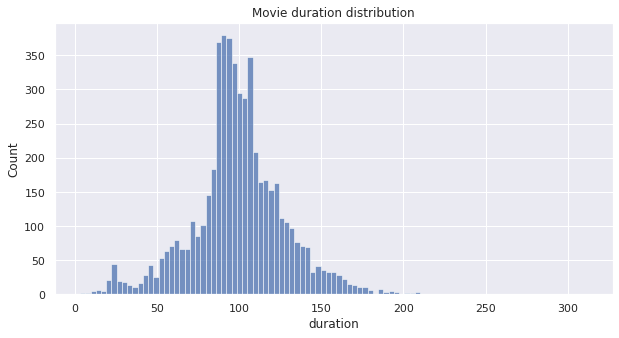

In [46]:
# Seasons in each TV show
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

In [47]:
# Movie statistics
df[df['type']== 'Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

* The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.

Text(0.5, 0, 'Year')

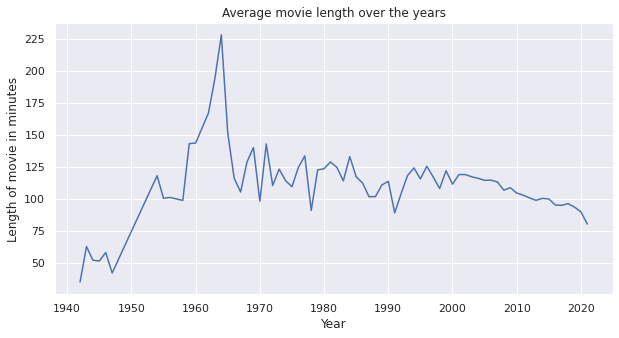

In [48]:
# Average movie length over the years
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

In [49]:
# Movie release year statistics
df[df['type']== 'Movie'].release_year.describe()

count    5377.000000
mean     2012.920030
std         9.663282
min      1942.000000
25%      2012.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

* Netflix has several movies on its site, including those that were released in way back 1942.
* As per the plot, movies made in the 1940s had a fairly short duration on average.
* On average, movies made in the 1960s have the longest movie length.
* The average length of a movie has been continuously decreasing since the 2000s.

Text(0.5, 1.0, 'Top 10 genres for movies')

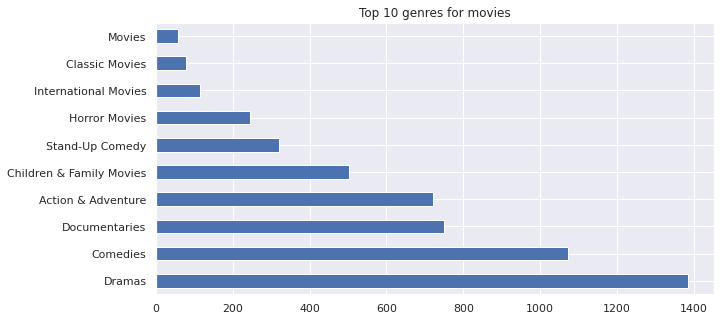

In [50]:
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

* Dramas, comedies, and documentaries are the most popular genre for the movies on Netflix.

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

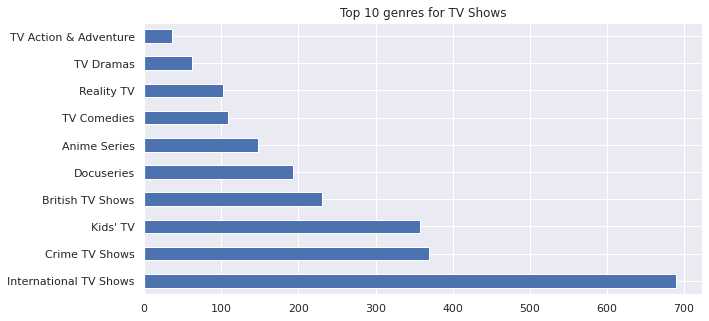

In [51]:
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')

* International, crime, and kids are the most popular genre for TV shows on Netflix.

Text(0.5, 1.0, 'Top 10 movie directors')

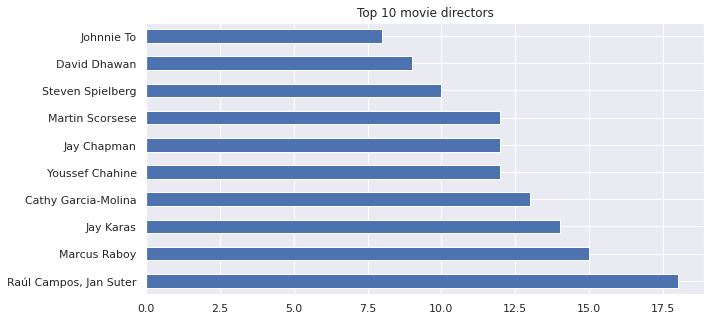

In [52]:
# Top 10 movie directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

* Raul Campos and Jan Suter have togather directed in 18 movies, higher than anyone yet.
* This is followed by Marcus Roboy, Jay Karas, and Cathy Gracia-Molina

Text(0.5, 1.0, 'Top 10 TV show directors')

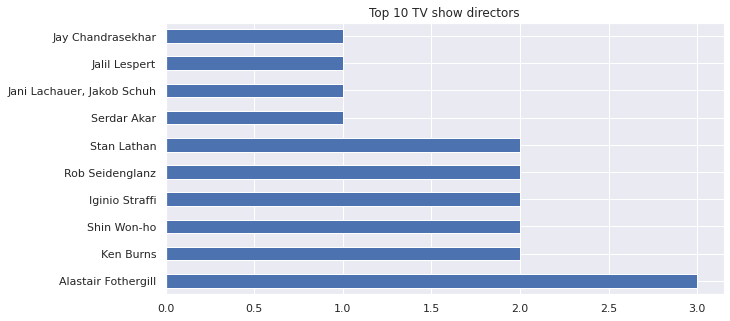

In [53]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')

* Alastair Fothergill has directed three TV shows, the most of any director.
* Only six directors have directed more than one television show.

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

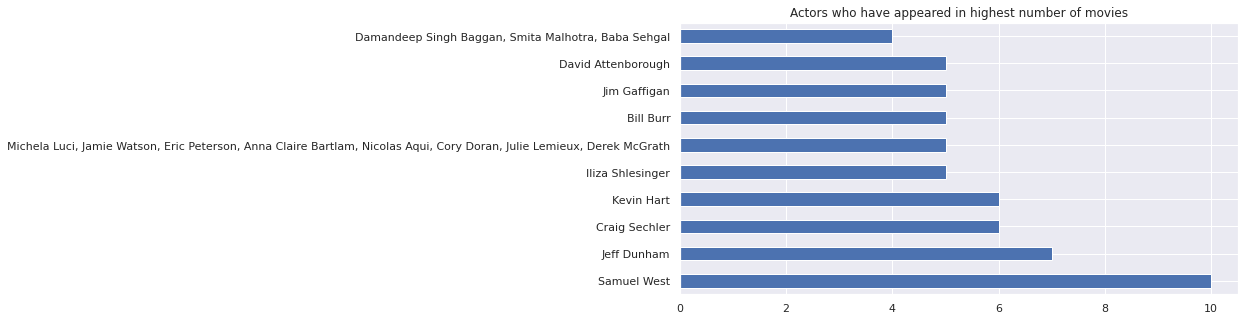

In [54]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

* Samuel West has appeared in 10 movies, followed by Jeff Dunham with 7 movies.

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

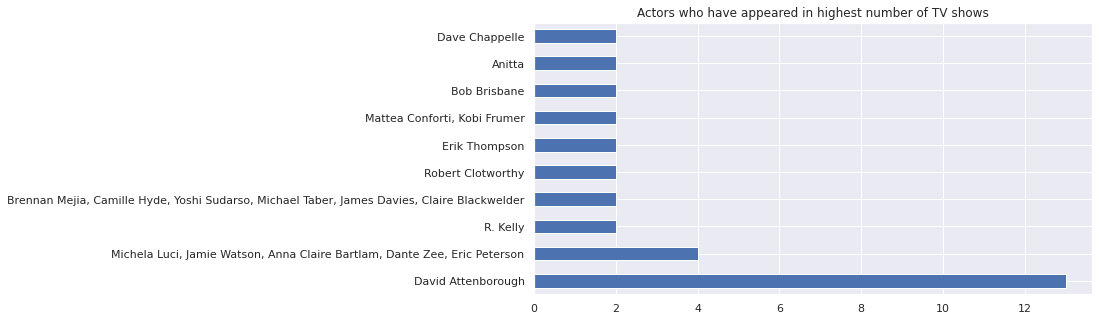

In [55]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

* David Attenborough has appeared in 13 TV shows, followed by Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson with 4 TV shows.

In [56]:
# importing wordcloud
from wordcloud import WordCloud, STOPWORDS

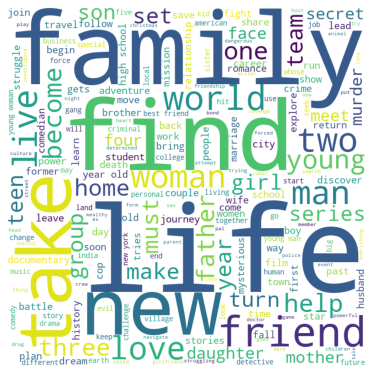

In [57]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# **Modelling**

**Modelling Approach:**

1. Select the attributes based on which you want to cluster the shows on Netflix
2. Text preprocessing: Tokenize the corpus, remove all non-ascii characters, convert all textual data to lowercase, remove punctuation marks, numbers and stopwords.
3. Stemming and Lemmatization to obtain the root word, and then generate a meaningful word out of it.
4. Dimensionality reduction
5. Word vectorization
6. Use different algorithms to cluster the movies, choose the best parameters using elbow-curve and silhouette score.
7. Build clusters using the best algorithm and its respective parameters, and different clusters using wordcloud.

For our problem, we will cluster the shows on Netflix based on the following attributes:
* Director
* Cast
* Country
* Rating
* Listed in (genres)
* Description

In [58]:
# Using the original dataset for clustering since
# it does not require handling missing values
df1 = original_df.copy()

In [59]:
df1.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [60]:
# Combining all the clustering attributes into a single column
# Adding a space between each value so that two words do not join
# Also filling the missing values with an empty string so that the rows containing missing values is not skipped in the result

df1['clustering_attributes'] = (df1['director'].fillna('') + ' ' + 
                                df1['cast'].fillna('') +' ' + 
                                df1['country'].fillna('') +' ' + 
                                df1['rating'].fillna('') +' ' + 
                                df1['listed_in'].fillna('') +' ' + 
                                df1['description'].fillna(''))

In [61]:
df1.clustering_attributes[0]

' João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil TV-MA International TV Shows, TV Dramas, TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [62]:
# Importing necessary libraries
import re, string, unicodedata
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from keras.preprocessing.text import Tokenizer

In [63]:
# Tokenization
tokenizer = Tokenizer(num_words="MAX_NB_WORDS")

In [64]:
tokenizer.fit_on_texts(df1['clustering_attributes'])

In [65]:
# Defining functions to preprocess the data
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    return words

In [66]:
tokenizer.fit_on_texts(df1['clustering_attributes'])

In [67]:
attribute_list = normalize(df1['clustering_attributes'])
print(attribute_list)

[' joao miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zeze motta celso frateschi brazil tvma international tv shows tv dramas tv scifi  fantasy in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor', 'jorge michel grau demian bichir hector bonilla oscar serrano azalia ortiz octavio michel carmen beato mexico tvma dramas international movies after a devastating earthquake hits mexico city trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive', 'gilbert chan tedd chan stella chung henley hii lawrence koh tommy kuan josh lai mark lee susan leong benjamin lim singapore r horror movies international movies when an army recruit is found dead his fellow soldiers are forced to confront a terrifying secret thats haunting their jungle island training camp', 'shane acker elijah wood john c re

In [68]:
len(attribute_list)

7787

In [69]:
# max_features od 20000 chosen so that the system doesn't crash
# Vectorizing using TFIDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words= 'english',max_features = 20000)

X = vectorizer.fit_transform(attribute_list)

In [70]:
X.shape

(7787, 20000)

In [71]:
type(X)

scipy.sparse.csr.csr_matrix

In [72]:
# convert X into array form for clustering
X = X.toarray()

In [73]:
# using PCA to reduce dimensionality
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

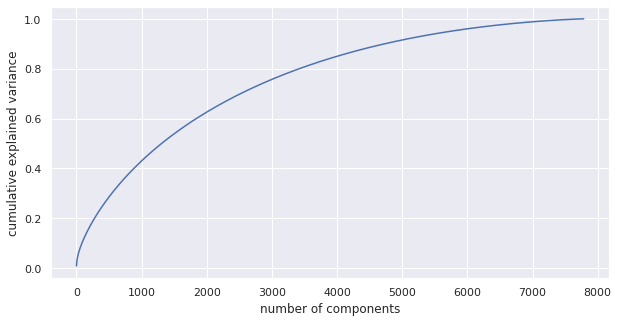

In [74]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

* We find that 100% of the variance is explained by about ~7500 components.
* Also, more than 80% of the variance is explained just by 4000 components.
* Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [75]:
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [76]:
x_pca = pca.transform(X)

In [77]:
x_pca.shape

(7787, 4000)

In [78]:
# vectorizer = TfidfVectorizer(stop_words= 'english',max_features = 4000)
# transformed_features = vectorizer.fit_transform(attribute_list)

In [79]:
# transformed_features.shape

**K-Means Clustering:**

Let's build a model using the K-means clustering algorithm.

In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

Text(0, 0.5, 'WCSS')

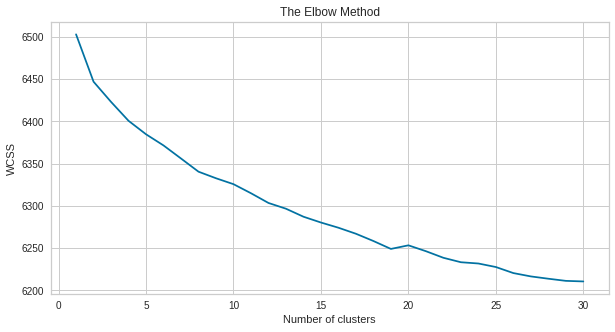

In [84]:
wcss=[]
silhouette_scores = []
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

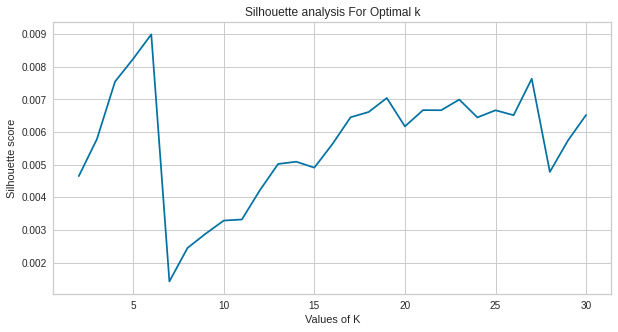

In [85]:
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

* The highest Silhouette score is obtained for 6 clusters.
* Hence we can cluster the Netflix movies and TV shows into 6 clusters.

In [89]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=33)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=33)

In [122]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6371.612959085407, 0.008990070643531365)


In [90]:
# Adding a kmeans cluster number attribute

df1['kmeans_cluster'] = kmeans.labels_

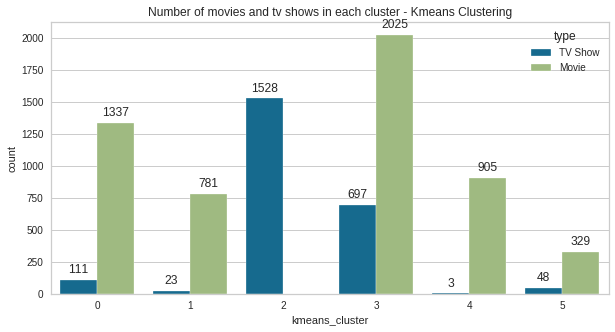

In [145]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df1, hue='type')
plt.title('Number of movies and tv shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Hierarchical clustering:**

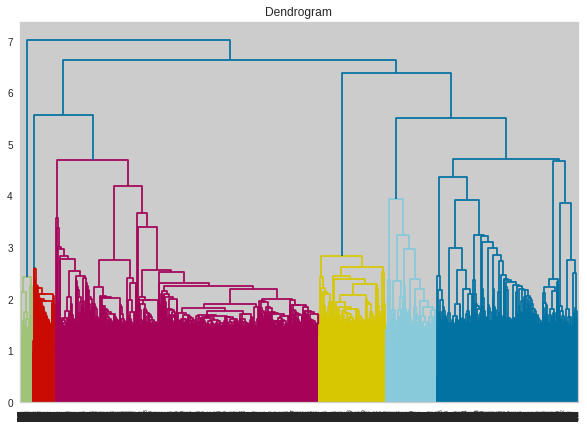

In [134]:
# Building a dendogram to decide on the number of clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Euclidean Distances')

In [ ]:
dendrogram = shc.dendrogram(shc.linkage(x_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y= 5, color='r', linestyle='--')
plt.show()

From the dendogram, it is clear that we can build 6 clusters on the dataset.

In [143]:
# Fitting hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(x_pca)

array([0, 0, 0, ..., 2, 5, 2])

In [144]:
# Evaluation metrics - distortion, Silhouette score
# hierarchical_distortion = hierarchical.inertia_
hierarchical_silhouette_score = silhouette_score(x_pca, hierarchical.labels_)

print((hierarchical_silhouette_score))

-0.002509906859748701


* The hierarchical clustering gives a negative Silhouette score for 6 clusters. 
* Hence we can say that the K means clustering is a better model compared to hierarchical clustering

In [146]:
# Adding a kmeans cluster number attribute

df1['hierarchical_cluster'] = hierarchical.labels_

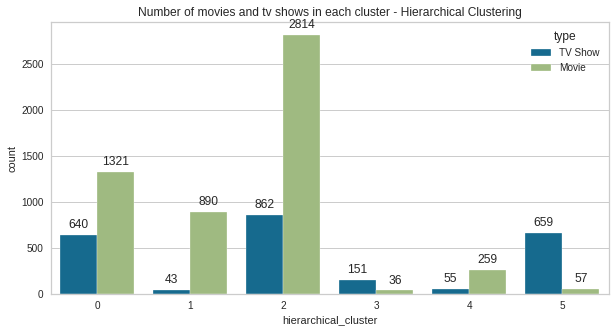

In [147]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df1, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')